In [ ]:
import polars as pl
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
from loguru import logger

In [ ]:
try:
    data = pl.read_csv("exercise_13.csv")
except Exception as e:
    logger.error(e)

    data = {
        "year": range(1976, 1986),
        "accidents": [24, 25, 31, 31, 22, 21, 26, 20, 16, 22],
        "deaths": [734, 516, 754, 877, 814, 362, 764, 809, 223, 1066],
        "death_rate": [0.19, 0.12, 0.15, 0.16, 0.14, 0.06, 0.13, 0.13, 0.03, 0.15],
    }

    data = pl.DataFrame(data)
    data.write_csv("exercise_13.csv", include_header=True)

data

year,accidents,deaths,death_rate
i64,i64,i64,f64
1976,24,734,0.19
1977,25,516,0.12
1978,31,754,0.15
1979,31,877,0.16
1980,22,814,0.14
1981,21,362,0.06
1982,26,764,0.13
1983,20,809,0.13
1984,16,223,0.03


In [25]:
data.describe()

statistic,year,accidents,deaths,death_rate
str,f64,f64,f64,f64
"""count""",10.0,10.0,10.0,10.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1980.5,23.8,691.9,0.126
"""std""",3.02765,4.709329,252.389228,0.047422
"""min""",1976.0,16.0,223.0,0.03
"""25%""",1978.0,21.0,516.0,0.12
"""50%""",1981.0,24.0,764.0,0.14
"""75%""",1983.0,26.0,814.0,0.15
"""max""",1985.0,31.0,1066.0,0.19


# Question A

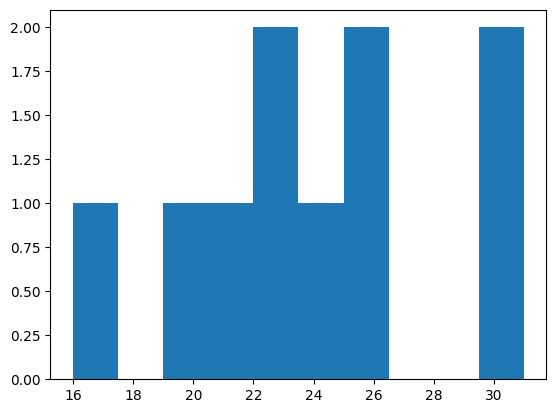

In [ ]:
plt.hist(data["accidents"])
plt.show()

In [ ]:
with pm.Model() as model_a:
    theta = pm.Exponential("theta", 2.0)
    accidents = pm.Poisson("accidents", mu=theta, observed=data["accidents"].to_list())

    trace_a = pm.sample(2000, tune=1000)
    prior_a = pm.sample_prior_predictive(draws=1000)
    posterior_a = pm.sample_posterior_predictive(trace=trace_a)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Sampling: [accidents, theta]
Sampling: [accidents]


Output()

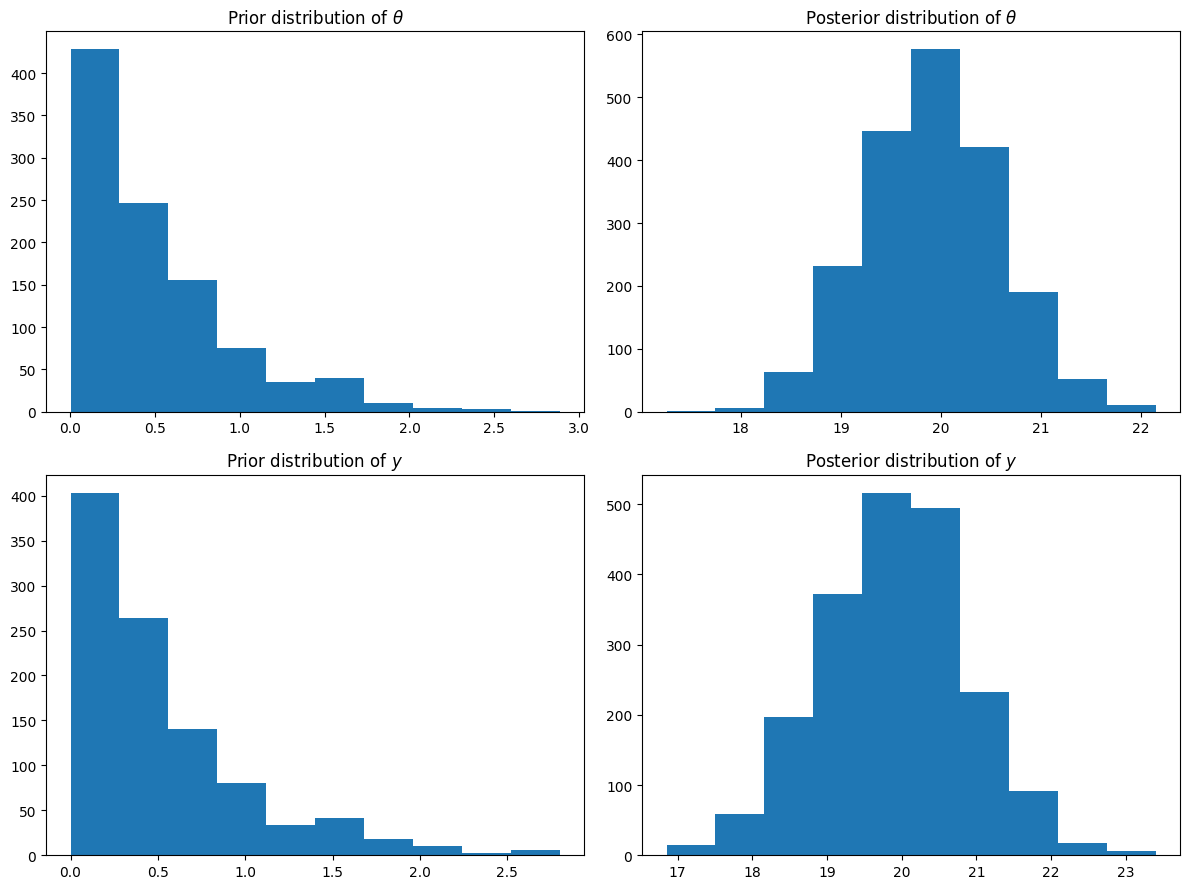

In [ ]:
_, axes = plt.subplots(2, 2, figsize=(12, 9))

axes[0][0].hist(prior_a.prior["theta"].mean("chain"))
axes[0][1].hist(trace_a.posterior["theta"].mean("chain"))

axes[0][0].set_title(r"Prior distribution of $\theta$")
axes[0][1].set_title(r"Posterior distribution of $\theta$")

axes[1][0].hist(
    prior_a.prior_predictive["accidents"].mean(("chain", "accidents_dim_0"))
)
axes[1][1].hist(
    posterior_a.posterior_predictive["accidents"].mean(("chain", "accidents_dim_0"))
)

axes[1][0].set_title("Prior distribution of $y$")
axes[1][1].set_title("Posterior distribution of $y$")

plt.tight_layout()
plt.show()

In [ ]:
np.percentile(
    posterior_a.posterior_predictive["accidents"].mean(("chain", "accidents_dim_0")),
    [2.5, 97.5],
)

array([18.      , 21.775625])